# Credit Card Fraud Detection

# Context


It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# Content


The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Problem Statement

To build a machine learning system that can detect whether a credit card transaction is legit or fraud.

# Work Flow

1.Data Collection -> involves dataset consisting of various features for analyzing the fraud detection

2.Data Preprocessing -> here we are having a very unbalaned dataset we need to make it balanced

3.Data Analysis -> to analyze the various features present in the dataset and to draw the relationships between them

4.Data Splitting -> training data & test data

5.Model Building -> Selecting the suitable model based on our insights (Logistic Regression - since it involves binary classification)

6.Model Evaluation -> Using the test data

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score

# Data Collection

Import dataset from CSV file

In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
# 5 rows of the dataset : Last two columns show Amount and Class 
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


DATA SET HAS 31 COLUMNS AND EACH OF IT HAS TWO CLASSES ( 0 AND 1). 0-INDICATES THAT IS NON-FRAUDULENT AND 1 INDICATES HAT IS FRAUD 
 

In [4]:
# 5 last rows of dataset 
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# Data Preprocessing

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# dataset information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# The calsses are going to be skewed, we will solve that later. 
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


# Exploratory Data Analysis 

In [8]:
# checking for number of missing values in each column 
data.isnull().sum().max()
# Dataset looks good no missing values 

0

In [9]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

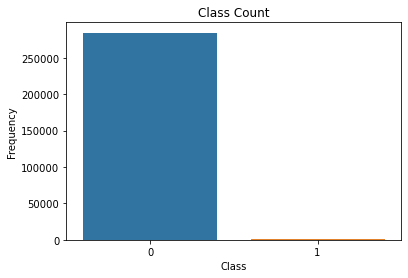

In [11]:
class_count = pd.value_counts(data['Class'], sort = True).sort_index()
sns.countplot(x="Class", data=data)
plt.title("Class Count")
plt.xlabel("Class")
plt.ylabel("Frequency")


We can see that its a class imbalance problem, because the normal transactions are more than 2500000 but the fraud transactions are very less.

In [12]:
# separating the two classes
fraud = data[data.Class == 1]
normal = data[data.Class == 0]

In [13]:
print(normal.shape, fraud.shape)

(284315, 31) (492, 31)


In [14]:
# Statistical measures of normal data
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
# Statistical measures of legit data
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
# comapring the mean value for both transactions on all columns
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


C:\Users\serik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

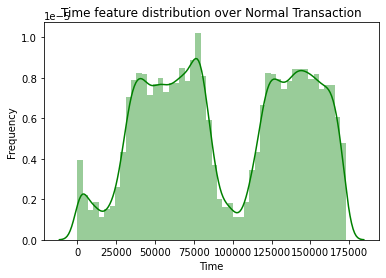

In [17]:
sns.distplot(normal.Time, color='g')
plt.title("Time feature distribution over Normal Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")


We can see the distribution of Time over Normal Transactions, we can interpret that they are 2 peaks in the distribution and nothing unusual.

C:\Users\serik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

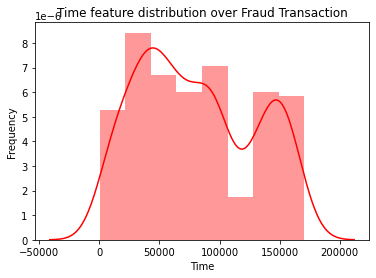

In [18]:
sns.distplot(fraud.Time, color='r')
plt.title("Time feature distribution over Fraud Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

We can see the distribution of Time over Fraud Transactions, we can interpret that it is a normal distribution and nothing unusual.

C:\Users\serik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

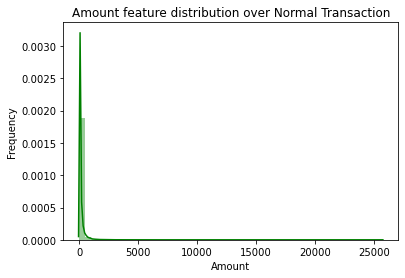

In [19]:
sns.distplot(normal.Amount, color='g')
plt.title("Amount feature distribution over Normal Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

We can see the distribution of Amount over Normal Transactions, we can interpret there is peak at the beginning but it becomes flat after the peak.

C:\Users\serik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

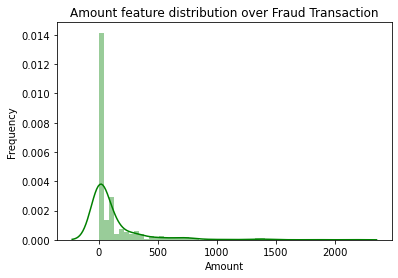

In [20]:
sns.distplot(fraud.Amount, color='g')
plt.title("Amount feature distribution over Fraud Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

We can see the distribution of Amount over Fraud Transactions, we can interpret there is huge peak at the beginning but it becomes flat after 900.

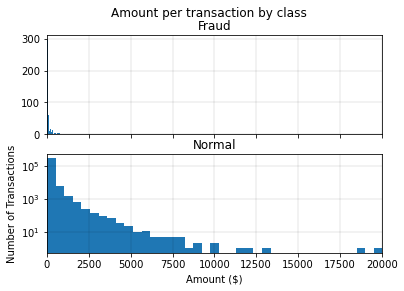

In [21]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50

ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax1.grid(color='k', linestyle='-', linewidth=0.1)

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
ax2.grid(color='k', linestyle='-', linewidth=0.1)

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()


We can see that Normal has more number of transactions over Amount when compared to Fraud Transactions.

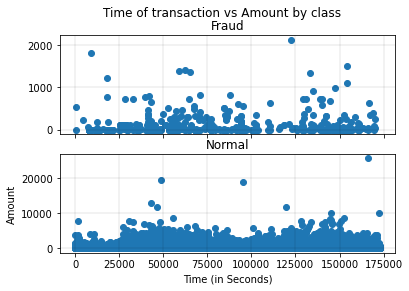

In [22]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax1.grid(color='k', linestyle='-', linewidth=0.1)


ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
ax2.grid(color='k', linestyle='-', linewidth=0.1)


plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

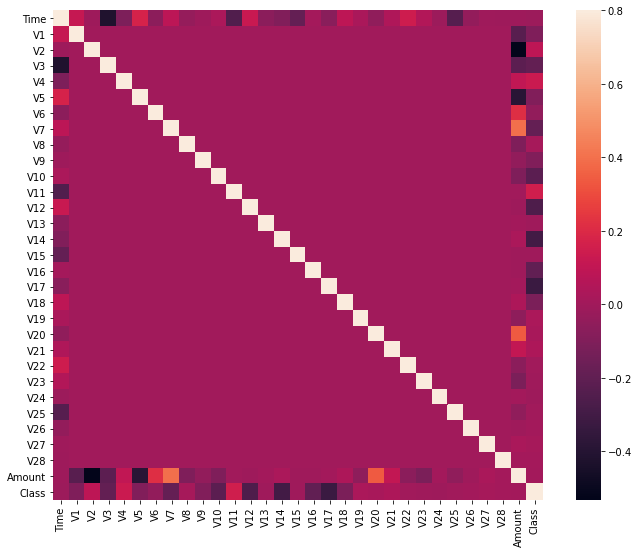

In [23]:
# Correlation Matrix 
corrmat =data.corr()
fig = plt.figure(figsize =(12,9))

sns.heatmap(corrmat,vmax =0.8, square = True)
plt.show()

In [24]:
# to make the dataset balanced we need to have equal number of normal & fraud transactions
# hence, we take only 492 values (since fraud having only 492) out of 284315 values of legit transactions
normal_sample = normal.sample(n=492)    # random sampling

In [25]:
# appending both legit_sample & fraud data

new_data = normal_sample.append(fraud)
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
153081,97863.0,1.924447,-0.370241,-1.278237,0.083990,0.721482,1.124278,-0.430515,0.242038,2.224983,...,0.018718,0.702557,0.041233,-1.632956,0.013057,0.268281,-0.008508,-0.096330,4.90,0
261034,159831.0,-0.386588,0.778992,-1.627937,-1.977282,3.410085,3.055153,0.496538,0.860102,-0.107897,...,-0.245091,-0.692377,0.122926,0.596352,-0.960989,-0.026721,0.307027,0.291103,2.69,0
43839,41670.0,0.767266,-0.436565,0.726679,1.144323,-0.691098,0.032656,-0.131890,0.169050,0.018818,...,0.054196,-0.256915,-0.016285,0.192628,0.101281,-0.596470,0.019435,0.053824,179.94,0
200015,133241.0,-1.559966,0.404558,-0.353682,-0.561380,0.818241,-0.866405,0.735936,0.417713,-0.347432,...,-0.031870,-0.378424,-0.018797,-0.453517,0.232457,-0.080996,0.201795,0.041135,118.53,0
17978,29084.0,-0.467412,-0.029629,2.017888,-0.332377,-0.923996,0.344525,0.189157,0.287065,0.723724,...,-0.088340,-0.201006,0.206528,0.115012,-0.358017,0.931907,-0.029993,0.021195,103.00,0


In [26]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [27]:

print(normal_sample.shape, fraud.shape)

(492, 31) (492, 31)


In [28]:
# comapring the mean value for both transactions on all columns after sampling
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94471.912602,0.150105,0.079740,0.058549,0.096354,0.002057,-0.037974,-0.053370,0.017288,-0.005108,...,0.006154,0.010841,-0.003079,0.008209,0.074974,-0.019782,0.034540,-0.001975,0.014616,73.526443
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321



Here, we see not very much change in the mean values of legit data after sampling. Therefore we got a good sample. Hence we can proceed further

# Data Splitting

In [29]:
x = new_data.iloc[:,:-1]
y = new_data.Class

In [30]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
153081   97863.0  1.924447 -0.370241 -1.278237  0.083990  0.721482  1.124278   
261034  159831.0 -0.386588  0.778992 -1.627937 -1.977282  3.410085  3.055153   
43839    41670.0  0.767266 -0.436565  0.726679  1.144323 -0.691098  0.032656   
200015  133241.0 -1.559966  0.404558 -0.353682 -0.561380  0.818241 -0.866405   
17978    29084.0 -0.467412 -0.029629  2.017888 -0.332377 -0.923996  0.344525   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [31]:

print(y)

153081    0
261034    0
43839     0
200015    0
17978     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [32]:
# Splitting into training data & test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2, stratify=y)

In [33]:
print(x.shape, x_train.shape, x_test.shape)

(984, 30) (787, 30) (197, 30)


# Logistic Regression

Model Building

In [34]:
# loading the logistic regression model
model  = LogisticRegression().fit(x_train, y_train)

C:\Users\serik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# accuracy of training data

x_train_pred = model.predict(x_train)
training_accuracy = accuracy_score(x_train_pred, y_train)
training_accuracy

0.9428208386277002

# Model Evaluation

Evaluation Metrics:

Accuracy Score – no. of correctly classified instances/total no. of instances

Precision Score – the ratio of correctly predicted instances over total positive instances

Recall Score – the ratio of correctly predicted instances over total instances in that class

Roc Curve – a plot of true positive rate against false positive rate

Confusion Matrix – a table used to describe the classification models

In [36]:
# accuracy of test data

x_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(x_test_pred, y_test)
test_accuracy

0.934010152284264

In [37]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, x_test_pred)

array([[97,  2],
       [11, 87]], dtype=int64)

In [38]:
# import accuracy_score, precision_score, recall_score, f1_score from scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Computing the accuracy, precision, recall and F1 scores of the model using your test data 'y_test' 
print('Accuracy score: ', format(accuracy_score(y_test, x_test_pred)))
print('Precision score: ', format(precision_score(y_test, x_test_pred)))
print('Recall score: ', format(recall_score(y_test, x_test_pred)))
print('F1 score: ', format(f1_score(y_test, x_test_pred)))

Accuracy score:  0.934010152284264
Precision score:  0.9775280898876404
Recall score:  0.8877551020408163
F1 score:  0.9304812834224598


# ROC Curve

In [39]:
# probability of the class using the predict_proba()
predictions_probability = model.predict_proba(x_test)
print("roc_auc_score: ",format(roc_auc_score(y_test, predictions_probability[:,1])))

roc_auc_score:  0.9808286951144094


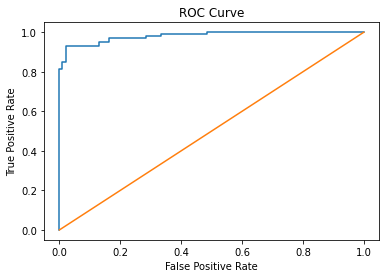

In [40]:
# ROC Curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test, predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


As we can see that our Logistic Regression model performed very well in classifying the Credit Card Transactions, with an Accuracy score, Precision and Recall of approx 93%. And the roc curve and confusion matrix are great as well which means that our model is able to classify the labels accurately, with fewer chances of error.

# Making a Predictive System

In [41]:
input_data = (11, 1.069373588, 0.287722129, 2.71252043, 0.828612727, -0.178398016, 0.33754373, -0.096716862, 
0.115981736, -0.221082566, 0.460230444, -0.773656931, 0.323387245, -0.011075887, -0.178485175, -0.655564278, 
-0.199925171, 0.124005415, -0.980496202, -0.982916082, -0.153197231, -0.036875532, 0.074412403, -0.071407433, 
0.104743753, 0.548264725, 0.104094153, 0.021491058, 0.021293311, 15.5)

# changing input_data to numpy array
input_data_array = np.asarray(input_data)

# reshaping the array
input_data_reshape = input_data_array.reshape(1, -1)

In [42]:
prediction = model.predict(input_data_reshape)
print(prediction)

[0]


In [43]:
input_data = (20451, -15.81917872, 8.775997153, -22.80468646, 11.86486808, -9.092360532, -2.386893207, -16.56036811, 
0.948348595, -6.31065843, -13.08889092, 9.815703174, -14.05606118, 0.777191846, -13.76101796, -0.35363594, -7.957447226,
-11.96295423, -4.780507788, 0.652498045, 0.992278949, -2.350633745, 1.036361874, 1.136050737, -1.043413741, -0.108923343,
0.657436778, 2.136424471, -1.411945375, 1)

# changing input_data to numpy array
input_data_array = np.asarray(input_data)

# reshaping the array
input_data_reshape = input_data_array.reshape(1, -1)

In [44]:
prediction = model.predict(input_data_reshape)
print(prediction)

[1]


# K Nearest Neighbours


Model Building

In [45]:
# importing the K neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Create the classifier
model_knn = KNeighborsClassifier(n_neighbors=5)

# fit the training data into the classifier
model_knn.fit(x_train, y_train)

pred_train_knn = model_knn.predict(x_train)
training_accuracy_knn = accuracy_score(pred_train_knn, y_train)
training_accuracy_knn

0.7712833545108005

In [46]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV 

parameters = [{'n_neighbors':[3,4,5,6,7,8,9,10,11,12,13,14,15]}]
search = GridSearchCV(model_knn, parameters, scoring='accuracy', cv=5, verbose=True).fit(x_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


In [47]:
# optimum parameter values
search.best_params_

{'n_neighbors': 10}

In [48]:
model_knn = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)

In [49]:
# accuracy of training data

pred_train_knn = model_knn.predict(x_train)
training_accuracy_knn = accuracy_score(pred_train_knn, y_train)
training_accuracy_knn

0.7712833545108005

# Model Evaluation

In [50]:
# accuracy of test data
pred_test_knn = model_knn.predict(x_test)
test_accuracy_knn = accuracy_score(pred_test_knn, y_test)
test_accuracy_knn

0.6243654822335025

In [51]:
# confusion matrix
confusion_matrix(y_test, pred_test_knn)

array([[63, 36],
       [38, 60]], dtype=int64)

In [52]:
# Computing the accuracy, precision, recall and F1 scores of the model using your test data 'y_test' 
print('Accuracy score: ', format(accuracy_score(y_test, pred_test_knn)))
print('Precision score: ', format(precision_score(y_test, pred_test_knn)))
print('Recall score: ', format(recall_score(y_test, pred_test_knn)))
print('F1 score: ', format(f1_score(y_test, pred_test_knn)))

Accuracy score:  0.6243654822335025
Precision score:  0.625
Recall score:  0.6122448979591837
F1 score:  0.6185567010309279


# ROC Curve

In [53]:
# probability of the class using the predict_proba()
predictions_probability = model_knn.predict_proba(x_test)
print("roc_auc_score: ",format(roc_auc_score(y_test, predictions_probability[:,1])))

roc_auc_score:  0.6930529787672646


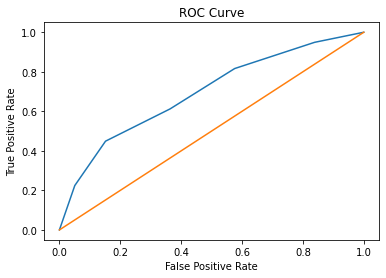

In [54]:

# ROC Curve
fpr,tpr,thresholds = roc_curve(y_test, predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

As we can see that our KNN Classifier model not performed well in classifying the Credit Card Transactions, with an Accuracy score, Precision and Recall of approx 63%. And the roc curve and confusion matrix are not good as well which means that our model is not able to classify the labels accurately.

# Support Vector Machine

# Model Building

In [55]:
# Loading Support Vector Machine Model

from sklearn import svm

model_svm = svm.SVC(kernel='linear').fit(x_train,y_train)

In [56]:
# accuracy of training data

x_train_svm = model_svm.predict(x_train)
training_accuracy_svm = accuracy_score(x_train_svm, y_train)
training_accuracy_svm

0.8932655654383735

# Model Evaluation

In [57]:
# accuracy of test data

x_test_svm = model_svm.predict(x_test)
test_accuracy_svm = accuracy_score(x_test_svm, y_test)
test_accuracy_svm

0.8934010152284264

In [58]:
# confusion matrix
confusion_matrix(y_test, x_test_svm)

array([[98,  1],
       [20, 78]], dtype=int64)

In [59]:
# Computing the accuracy, precision, recall and F1 scores of the model using your test data 'y_test' 
print('Accuracy score: ', format(accuracy_score(y_test, x_test_svm)))
print('Precision score: ', format(precision_score(y_test, x_test_svm)))
print('Recall score: ', format(recall_score(y_test, x_test_svm)))
print('F1 score: ', format(f1_score(y_test, x_test_svm)))

Accuracy score:  0.8934010152284264
Precision score:  0.9873417721518988
Recall score:  0.7959183673469388
F1 score:  0.8813559322033897


As we can see that our SVM Classifier model performed good in classifying the credit card transactions, with an Accuracy score, Precision and Recall of approx 90%.

# Naive Bayes

# Model Building

In [60]:
# Loading Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

model_naive = GaussianNB().fit(x_train,y_train)

In [61]:

# accuracy of training data

x_train_nb = model_naive.predict(x_train)
training_accuracy_nb = accuracy_score(x_train_nb, y_train)
training_accuracy_nb

0.841168996188056

Model Evaluation

In [62]:
# accuracy of test data

x_test_nb = model_naive.predict(x_test)
test_accuracy_nb = accuracy_score(x_test_nb, y_test)
test_accuracy_nb

0.8477157360406091

In [63]:

# confusion matrix
confusion_matrix(y_test, x_test_nb)

array([[98,  1],
       [29, 69]], dtype=int64)

In [64]:
# Computing the accuracy, precision, recall and F1 scores of the model using your test data 'y_test' 
print('Accuracy score: ', format(accuracy_score(y_test, x_test_nb)))
print('Precision score: ', format(precision_score(y_test, x_test_nb)))
print('Recall score: ', format(recall_score(y_test, x_test_nb)))
print('F1 score: ', format(f1_score(y_test, x_test_nb)))

Accuracy score:  0.8477157360406091
Precision score:  0.9857142857142858
Recall score:  0.7040816326530612
F1 score:  0.8214285714285714


ROC Curve

In [65]:
# probability of the class using the predict_proba()
predictions_probability = model_naive.predict_proba(x_test)
print("roc_auc_score: ",format(roc_auc_score(y_test, predictions_probability[:,1])))

roc_auc_score:  0.9660894660894661


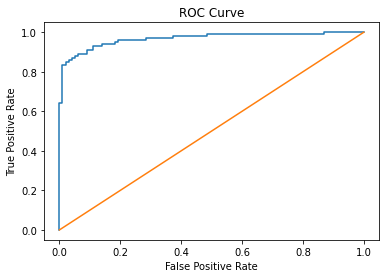

In [66]:
# ROC Curve
fpr,tpr,thresholds = roc_curve(y_test, predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

As we can see that our Naive Bayes model performed well in classifying the credit card transactions, with an Accuracy score, Precision and Recall of approx 86%. And the roc curve and confusion matrix are good as well which means that Naive Bayes model is able to classify the labels accurately, with fewer chances of error.

# Conclusion and Comparison 


Decreasing order of accuracy is depicted as:

Logistic Regression - 0.9492

Support Vector Machine - 0.9086

Naive Bayes - 0.8629

K-nearest Neighbors - 0.6853

The results are highly clear that except KNN all the models are good in detecting the fraud transactions. Logistic Regression is the most accurate method because its ability to handle binary data. Also, it performs well even with the presence of principal components of features and is relatively unaffected by them.